# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Rafli Fauzi
- **Email:** m214d4ky2137@bangkit.academy
- **ID Dicoding:** rafli_fauzi

## Menentukan Pertanyaan Bisnis

- Bagaimana Perkembangan penyewaan sepeda dari waktu ke waktu?
- Apakah ada perbedaan dalam weekday vs weekends?
- Apakah musim/kondisi cuaca mempengaruhi penyewa sepeda?

## Menyiapkan Library Python yang Dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pipreqsnb

## Data Wrangling

### Data Gathering (day.csv)

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Untuk membaca file csv kemudian dijadikan dataframe beserta menampilkan 5 baris pertama dari dataframe

### Data Gathering (hour.csv)

In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Untuk membaca file csv kemudian dijadikan dataframe beserta menampilkan 5 baris pertama dari dataframe

## Assessing Data

#### Menilai tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada data yang kosong

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print(" ")
day_df.describe()

Jumlah duplikasi:  0
 


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada data yang nilai terduplikasi

#### Menilai tabel hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak ada data yang nilainya kosong

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang kosong

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print(" ")
hour_df.describe()

Jumlah duplikasi:  0
 


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada data yang nilainya terduplikasi

## Cleaning Data

Tidak ada data yang perlu dibersihkan

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [10]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
706,707,2012-12-07,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,349,4659,5008
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
299,300,2011-10-27,4,0,10,0,4,1,2,0.470000,0.457046,0.812917,0.197763,240,2419,2659


Mengambil sampel acak sebanyak 5 baris dari DataFrame day_df.

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Memberikan ringkasan statistik dari DataFrame day_df, termasuk kolom-kolom numerik maupun kategorikal.

### Explore `hour_df`

In [12]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4816,4817,2011-07-24,3,0,7,14,0,0,0,1,0.86,0.8182,0.50,0.2836,79,204,283
16499,16500,2012-11-25,4,1,11,5,0,0,0,2,0.22,0.2273,0.47,0.1642,0,3,3
3596,3597,2011-06-03,2,0,6,18,0,5,1,1,0.70,0.6364,0.24,0.2985,76,488,564
5526,5527,2011-08-23,3,0,8,4,0,2,1,1,0.54,0.5152,0.56,0.1642,0,5,5
6496,6497,2011-10-03,4,0,10,6,0,1,1,2,0.36,0.3788,0.71,0.0000,3,91,94


Mengambil sampel acak sebanyak 5 baris dari DataFrame hour_df.

In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Memberikan ringkasan statistik dari DataFrame hour_df, termasuk kolom-kolom numerik maupun kategorikal.

### RFM Analisis

In [41]:
df = pd.concat([day_df, hour_df])

df['dteday'] = pd.to_datetime(df['dteday'])

snapshot_date = df['dteday'].max() + pd.DateOffset(days=1)
rfm_data = df.groupby('instant').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,
    'instant': 'count',
    'cnt': 'sum'
}).rename(columns={
    'dteday': 'recency',
    'instant': 'frequency',
    'cnt': 'monetary'
})

quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])

def r_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def fm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

rfm_segmentation = rfm_data.copy()
rfm_segmentation['R'] = rfm_segmentation['recency'].apply(r_score, args=('recency', quantiles))
rfm_segmentation['F'] = rfm_segmentation['frequency'].apply(fm_score, args=('frequency', quantiles))
rfm_segmentation['M'] = rfm_segmentation['monetary'].apply(fm_score, args=('monetary', quantiles))

rfm_segmentation['RFM Score'] = rfm_segmentation['R'].map(str) + rfm_segmentation['F'].map(str) + rfm_segmentation['M'].map(str)

print(rfm_segmentation)

         recency  frequency  monetary  R  F  M RFM Score
instant                                                 
1            731          2      1001  1  4  4       144
2            730          2       841  1  4  4       144
3            729          2      1381  1  4  4       144
4            728          2      1575  1  4  4       144
5            727          2      1601  1  4  4       144
...          ...        ...       ... .. .. ..       ...
17375          1          1       119  4  1  2       412
17376          1          1        89  4  1  2       412
17377          1          1        90  4  1  2       412
17378          1          1        61  4  1  2       412
17379          1          1        49  4  1  2       412

[17379 rows x 7 columns]


RFM score adalah hasil dari kombinasi nilai Recency, Frequency, dan Monetary. Masing-masing nilai diberi skor dari 1 hingga 5, dengan 5 menunjukkan yang terbaik.

RFM 144 : dengan nilai RFM yang rendah pada aspek ketekunan (Recency), tetapi dengan frekuensi pembelian yang baik dan pengeluaran uang yang signifikan, menunjukkan bahwa meskipun mereka tidak berbelanja baru-baru ini, mereka masih merupakan pelanggan yang berharga karena sering berbelanja dan menghabiskan jumlah uang yang besar ketika mereka melakukannya.

## VISUALISASI DATA

### Bagaimana Perkembangan penyewaan sepeda dari waktu ke waktu?

Menggunakan Timeline chart untuk mengetahui perkembangan jumlah penyewa (day version)

datetime64[ns]


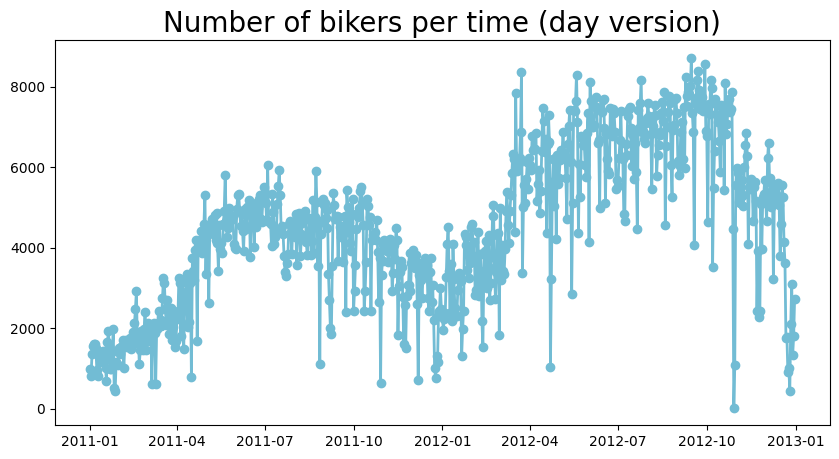

In [23]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

print(day_df['dteday'].dtype)

plt.figure(figsize=(10, 5))
plt.plot(
    day_df["dteday"],
    day_df["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of bikers per time (day version)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### Menggunakan Timeline chart untuk mengetahui perkembangan jumlah penyewa (hour version)

datetime64[ns]


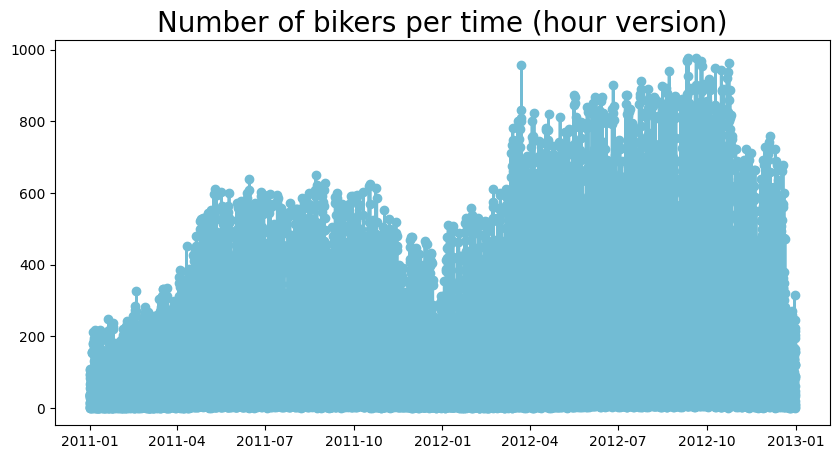

In [24]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print(hour_df['dteday'].dtype)

plt.figure(figsize=(10, 5))
plt.plot(
    hour_df["dteday"],
    hour_df["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of bikers per time (hour version)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Apakah ada perbedaan dalam weekday vs weekends?

##### Menggunakan bar chart untuk membandingkan perbedaan jumlah penyewa sepeda antara hari kerja dengan hari libur

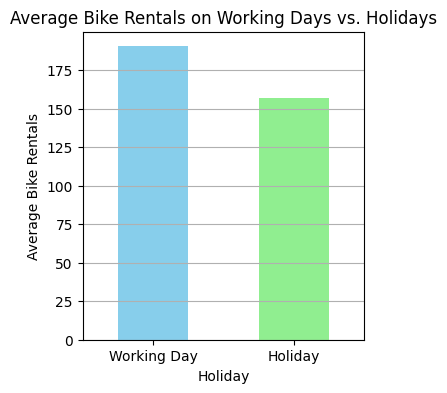

In [34]:
average_rentals = hour_df.groupby('holiday')['cnt'].mean()


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
average_rentals.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Bike Rentals on Working Days vs. Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Rentals')
plt.xticks([0, 1], ['Working Day', 'Holiday'], rotation=0)  
plt.grid(axis='y')  
plt.show()


        Terdapat lebih banyak orang yang menyewa sepeda pada hari kerja daripada pada hari libur. Hal ini mungkin karena pada hari kerja, orang-orang sering menggunakan sepeda sebagai sarana transportasi untuk pergi ke tempat kerja atau sekolah. Di sisi lain, pada hari libur, orang cenderung memiliki lebih banyak pilihan untuk menghabiskan waktu luang mereka, sehingga penggunaan sepeda mungkin tidak sebanyak pada hari kerja.

##### Menggunakan Timeline chart untuk mengetahui kapan orang-orang bersepeda

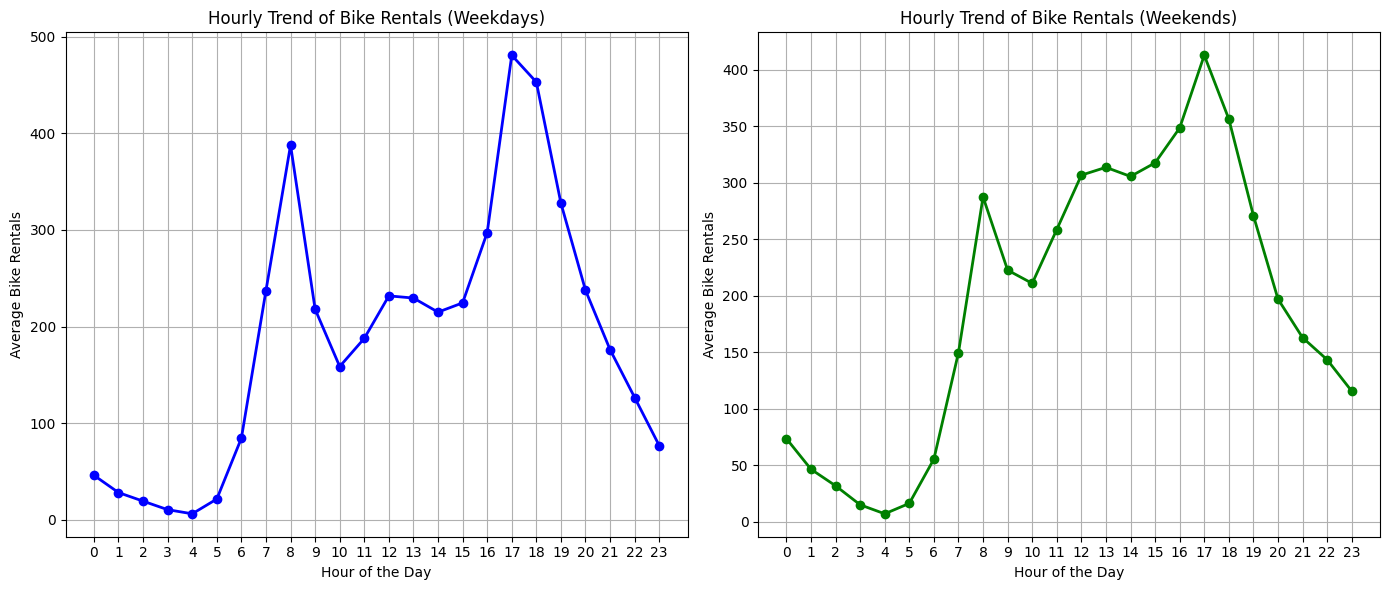

In [19]:
weekdays_df = hour_df[hour_df['weekday'] < 5]  
weekends_df = hour_df[hour_df['weekday'] >= 5]  

hourly_rentals_weekdays = weekdays_df.groupby('hr')['cnt'].mean()
hourly_rentals_weekends = weekends_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
hourly_rentals_weekdays.plot(kind='line', color='blue', marker='o', linewidth=2)
plt.title('Hourly Trend of Bike Rentals (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(24))  # Set x-axis ticks to show every hour
plt.grid(True)  

plt.subplot(1, 2, 2)
hourly_rentals_weekends.plot(kind='line', color='green', marker='o', linewidth=2)
plt.title('Hourly Trend of Bike Rentals (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(24))  
plt.grid(True)  

plt.tight_layout()
plt.show()

        Pada hari-hari kerja, terlihat bahwa antara pukul 7 hingga 8 pagi adalah saat di mana banyak orang menggunakan sepeda untuk berangkat bekerja atau sekolah, atau untuk berolahraga. Di antara pukul 9 dan 15, orang-orang biasanya tengah melakukan rutinitas harian mereka. Namun, pada pukul 17, terjadi peningkatan penggunaan sepeda lagi dengan asumsi untuk berolahraga sore ataupun kembali dari tempat kerja/sekolahan. Sedangkan pada hari libur, terjadi peningkatan penggunaan sepeda mulai dari pukul 9 hingga 15, karena pada saat itu orang memiliki lebih banyak waktu luang untuk melakukan aktivitas rekreasi seperti bersepeda.

## Apakah musim/kondisi cuaca mempengaruhi penyewa sepeda?

##### Menggunakan bar chart untuk membandingkan jumlah penyewa per-musim

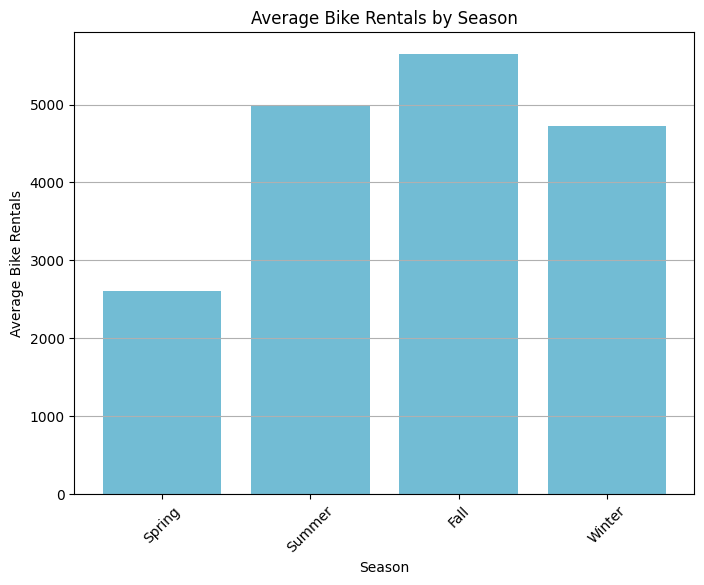

In [43]:
season_avg_rentals = day_df.groupby('season')['cnt'].mean()


season_labels = ['Spring', 'Summer', 'Fall', 'Winter']


plt.figure(figsize=(8, 6))
plt.bar(season_labels, season_avg_rentals, color='#72BCD4')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()

        Musim gugur menjadi puncak aktivitas bersepeda, diikuti oleh musim panas dan musim dingin. Oleh karena itu, strategi pemasaran dapat disesuaikan dengan tren musiman ini. Namun, musim semi mungkin kurang cocok untuk promosi bersepeda karena musim ini lebih sering diidentikkan dengan kegiatan piknik daripada bersepeda.

##### Menggunakan Scatter plot disertai garis untuk mengetahui korelasi antar variables lingkup kondisi cuaca

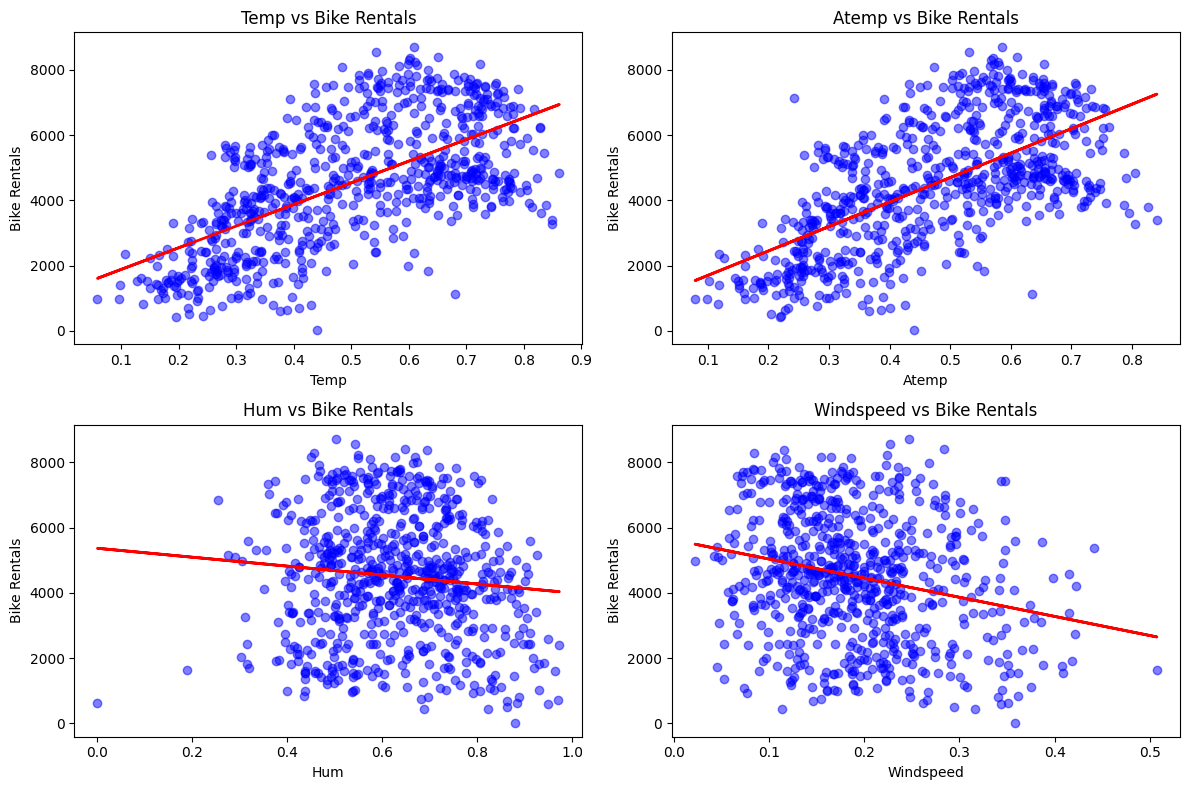

In [42]:
from sklearn.linear_model import LinearRegression

weather_variables = ['temp', 'atemp', 'hum', 'windspeed']
bike_rentals = 'cnt'

plt.figure(figsize=(12, 8))

for i, weather_var in enumerate(weather_variables, 1):
    plt.subplot(2, 2, i)
    x = day_df[weather_var].values.reshape(-1, 1)
    y = day_df[bike_rentals]
    plt.scatter(x, y, alpha=0.5, color='blue')

    model = LinearRegression()
    model.fit(x, y)

    plt.plot(x, model.predict(x), color='red', linewidth=2)
    
    plt.title(f'{weather_var.capitalize()} vs Bike Rentals')
    plt.xlabel(weather_var.capitalize())
    plt.ylabel('Bike Rentals')

plt.tight_layout()
plt.show()

        Para penyewa sepeda cenderung lebih memilih untuk bersepeda saat suhu hangat daripada saat suhu dingin. Terdapat pola yang menunjukkan bahwa semakin tinggi suhu (temp & Atemp), semakin banyak juga orang yang menyewa sepeda.
        
        Dalam konteks kelembaban udara (hum) yang terkait dengan preferensi penyewa sepeda, biasanya orang lebih nyaman dengan kelembaban udara yang rendah, karena udara yang kering cenderung terasa lebih nyaman bagi kegiatan bersepeda. Oleh karena itu, jika kelembaban udara rendah, penyewa kemungkinan akan lebih menyukainya.
        
        Orang-orang lebih suka bersepeda ketika kecepatan angin (windspeed) rendah, dan terdapat pola yang menunjukkan bahwa semakin rendah kecepatan anginnya, semakin banyak orang yang bersepeda.

## Kesimpulan

##### Bagaimana Perkembangan penyewaan sepeda dari waktu ke waktu?
        Dalam dua tahun terakhir, terlihat tren peningkatan jumlah orang yang menyewa sepeda, dengan puncaknya terjadi setiap dari bulan April hingga Oktober. Namun demikian, terdapat pola yang menunjukkan penurunan jumlah penyewa saat mendekati tahun baru. Hal ini disebabkan oleh adanya hari-hari istimewa seperti Natal dan tahun baru, di mana orang-orang lebih cenderung menghabiskan waktu bersama keluarga dan teman-teman mereka daripada melakukan kegiatan seperti menyewa sepeda.
  
##### Apakah ada perbedaan dalam weekday vs weekends?
        Pada hari-hari kerja, terlihat bahwa antara pukul 7 hingga 8 pagi adalah saat di mana banyak orang menggunakan sepeda untuk berangkat bekerja atau sekolah, atau untuk berolahraga. Di antara pukul 9 dan 15, orang-orang biasanya tengah melakukan rutinitas harian mereka. Namun, pada pukul 17, terjadi peningkatan penggunaan sepeda lagi dengan asumsi untuk berolahraga sore ataupun kembali dari tempat kerja/sekolahan. Sedangkan pada hari libur, terjadi peningkatan penggunaan sepeda mulai dari pukul 9 hingga 15, karena pada saat itu orang memiliki lebih banyak waktu luang untuk melakukan aktivitas rekreasi seperti bersepeda.
        
        Namun, terdapat lebih banyak orang yang menyewa sepeda pada hari kerja daripada pada hari libur. Hal ini mungkin karena pada hari kerja, orang-orang sering menggunakan sepeda sebagai sarana transportasi untuk pergi ke tempat kerja atau sekolah. Di sisi lain, pada hari libur, orang cenderung memiliki lebih banyak pilihan untuk menghabiskan waktu luang mereka, sehingga penggunaan sepeda mungkin tidak sebanyak pada hari kerja.

##### Apakah musim/kondisi cuaca mempengaruhi penyewa sepeda?
        Musim gugur menjadi puncak aktivitas bersepeda, diikuti oleh musim panas dan musim dingin. Oleh karena itu, strategi pemasaran dapat disesuaikan dengan tren musiman ini. Namun, musim semi mungkin kurang cocok untuk promosi bersepeda karena musim ini lebih sering diidentikkan dengan kegiatan piknik daripada bersepeda.
        
        Para penyewa sepeda cenderung lebih memilih untuk bersepeda saat suhu (temp & Atemp) hangat daripada saat suhu dingin. Terdapat pola yang menunjukkan bahwa semakin tinggi suhu, semakin banyak juga orang yang menyewa sepeda.
        
        Dalam konteks kelembaban udara (hum) yang terkait dengan preferensi penyewa sepeda, biasanya orang lebih nyaman dengan kelembaban udara yang rendah, karena udara yang kering cenderung terasa lebih nyaman bagi kegiatan bersepeda. Oleh karena itu, jika kelembaban udara rendah, penyewa kemungkinan akan lebih menyukainya.
        
        Orang-orang lebih suka bersepeda ketika kecepatan angin rendah, dan terdapat pola yang menunjukkan bahwa semakin rendah kecepatan anginnya, semakin banyak orang yang bersepeda.
        